In [174]:
import pandas as pd
import seaborn as sbn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib

### Data

In [323]:
df = pd.read_excel ('/Users/mac/Dropbox/penguins.xlsx')

In [324]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [325]:
df['y'] = 0

### put label on the 'species'

In [326]:
df['y'].loc[df['species']=='Adelie'] = 1 
df['y'].loc[df['species']=='Gentoo'] = 2
df['y'].loc[df['species']=='Chinstrap'] = 3

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [327]:
df['y']

0      1
1      1
2      1
3      1
4      1
      ..
339    3
340    3
341    3
342    3
343    3
Name: y, Length: 344, dtype: int64

### delete nan values

In [328]:
df.drop(df[df['body_mass_g'].isnull()].index,axis=0, inplace=True)

## Variables 

* Discovered that island, sex, year don't have impact on the species
    - 'island' already classified like 'species'
    - 'sex' is distributed evenly 
    - 'year' has no correlation with 'species'
    
* 추가적으로 데이터를 활용한 classification 실행 후 이를 visualization을 하기 위해 iris 데이터처럼 2가지 변수를 택해서 classification을 실시함

In [329]:
X = df[['flipper_length_mm','body_mass_g']]
y = df['y']

### standardization

In [330]:
from sklearn import preprocessing
X = preprocessing.scale(X)

# 1. Multiclass Logistic Regression (with Elastic Net Penalty)

### Elastic Net Penalty: use Ridge & Lasso

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [332]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'elasticnet',  dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5 ).fit(X_train, y_train)
pred = model.predict(X_test)

In [333]:
from sklearn.metrics import classification_report, confusion_matrix
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[31  0  1]
 [ 0 23  0]
 [ 9  1  4]]


# 2. SVM

In [334]:
from sklearn import svm, datasets

### 2.1 Use different Kernel functions

In [335]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [336]:
linear_pred = linear.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_pred = poly.predict(X_test)
sig_pred = sig.predict(X_test)

In [337]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

In [338]:
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.8260869565217391
Accuracy Radial Basis Kernel: 0.855072463768116
Accuracy Polynomial Kernel: 0.782608695652174
Accuracy Sigmoid Kernel: 0.7391304347826086


In [339]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_sig = confusion_matrix(y_test, sig_pred)

In [340]:
print(cm_lin)
print(cm_rbf)
print(cm_poly)
print(cm_sig)

[[32  0  0]
 [ 0 23  0]
 [11  1  2]]
[[30  0  2]
 [ 0 23  0]
 [ 7  1  6]]
[[32  0  0]
 [ 1 22  0]
 [14  0  0]]
[[27  0  5]
 [ 0 23  0]
 [12  1  1]]


### 결과로 보았을 때에 딱 하나가 제일 잘 classification 했다고 말하기 어려움이 있기 때문에 그림으로도 확인해 볼 필요가 있음

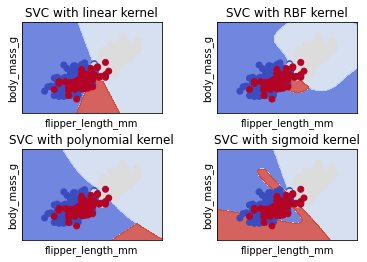

In [351]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel',
         'SVC with sigmoid kernel']


for i, clf in enumerate((linear, rbf, poly, sig)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### 2.2 gamma 와 cost 찾기

In [342]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [343]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma= gamma, C = C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score>best_score:
            best_score = score
            best_parameter = {'gamma': gamma, 'C':C}
svm = SVC(**best_parameter)
svm.fit(X_train, y_train)
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

train_score,test_score


(0.8315018315018315, 0.8695652173913043)

### 위의 계산을 통해 구해낸 가장 적합한 $\gamma$ 와 C

In [344]:
best_parameter

{'gamma': 1, 'C': 10}

#### Kernel 함수는 Radial 이용

In [352]:
best_SVM = SVC(kernel='rbf', gamma=1, C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [353]:
best_pred = best_SVM.predict(X_test)

In [354]:
accuracy_best = best_SVM.score(X_test, y_test)
print("Accuracy Radial Basis Kernel:", accuracy_best)

Accuracy Radial Basis Kernel: 0.8695652173913043


In [355]:
cm_best = confusion_matrix(y_test, best_pred)
print(cm_best)

[[30  0  2]
 [ 0 23  0]
 [ 6  1  7]]


### 분석 결과 그림으로 확인하기

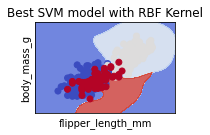

In [361]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['Best SVM model with RBF Kernel']

plt.subplot(2, 2, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = best_SVM.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[i])

plt.show()

# 3. LDA

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [364]:
LDA = LinearDiscriminantAnalysis()
res_LDA = LDA.fit(X,y)

In [188]:
y_LDA = LDA.predict(X)
confusion_matrix(y,y_LDA)

array([[150,   0,   1],
       [  0, 123,   0],
       [  3,   0,  65]])

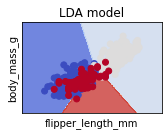

In [365]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['LDA model']

plt.subplot(2, 2, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = res_LDA.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[i])

plt.show()

# 4. QDA

In [189]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [366]:
QDA = QuadraticDiscriminantAnalysis()
res_QDA=QDA.fit(X,y)

In [191]:
y_QDA = QDA.predict(X)
confusion_matrix(y,y_QDA)

array([[149,   0,   2],
       [  0, 123,   0],
       [  2,   0,  66]])

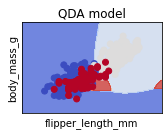

In [367]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['QDA model']

plt.subplot(2, 2, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = res_QDA.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[i])

plt.show()